In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
np.random.seed(42)

# Preprocessing

In [3]:
# df = pd.read_csv("NSL_KDD_Train.csv")
train_url = 'https://raw.githubusercontent.com/merteroglu/NSL-KDD-Network-Instrusion-Detection/master/NSL_KDD_Train.csv'
test_url = 'https://raw.githubusercontent.com/merteroglu/NSL-KDD-Network-Instrusion-Detection/master/NSL_KDD_Test.csv'

In [4]:
col_names = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","label"]


df_train = pd.read_csv(train_url,header=None, names = col_names)

df_test = pd.read_csv(test_url, header=None, names = col_names)

print('Dimensions of the Training set:',df_train.shape)
print('Dimensions of the Test set:',df_test.shape)

Dimensions of the Training set: (125973, 42)
Dimensions of the Test set: (22544, 42)


### Combine the train and test dataset

In [5]:
df = pd.concat([df_train,df_test])

In [6]:
print(f"Dimentions of complete dataframe : {df.shape}")

Dimentions of complete dataframe : (148517, 42)


In [7]:
pd.options.display.max_rows = 999999
pd.options.display.max_columns = 500
pd.options.display.max_colwidth=1000

In [8]:
df.head(10)

duration protocol_type     service flag  src_bytes  dst_bytes  land  \
0         0           tcp    ftp_data   SF        491          0     0   
1         0           udp       other   SF        146          0     0   
2         0           tcp     private   S0          0          0     0   
3         0           tcp        http   SF        232       8153     0   
4         0           tcp        http   SF        199        420     0   
5         0           tcp     private  REJ          0          0     0   
6         0           tcp     private   S0          0          0     0   
7         0           tcp     private   S0          0          0     0   
8         0           tcp  remote_job   S0          0          0     0   
9         0           tcp     private   S0          0          0     0   

   wrong_fragment  urgent  hot  num_failed_logins  logged_in  num_compromised  \
0               0       0    0                  0          0                0   
1               0       0    0                  0          0                0   
2               0       0    0                  0          0                0   
3               0       0    0                  0          1                0   
4               0       0    0                  0          1                0   
5               0       0    0                  0          0                0   
6               0       0    0                  0          0                0   
7               0       0    0                  0          0                0   
8               0       0    0                  0          0                0   
9               0       0    0                  0          0                0   

   root_shell  su_attempted  num_root  num_file_creations  num_shells  \
0           0             0         0                   0           0   
1           0             0         0                   0           0   
2           0             0         0                   0           0   
3           0             0         0                   0           0   
4           0             0         0                   0           0   
5           0             0         0                   0           0   
6           0             0         0                   0           0   
7           0             0         0                   0           0   
8           0             0         0                   0           0   
9           0             0         0                   0           0   

   num_access_files  num_outbound_cmds  is_host_login  is_guest_login  count  \
0                 0                  0              0               0      2   
1                 0                  0              0               0     13   
2                 0                  0              0               0    123   
3                 0                  0              0               0      5   
4                 0                  0              0               0     30   
5                 0                  0              0               0    121   
6                 0                  0              0               0    166   
7                 0                  0              0               0    117   
8                 0                  0              0               0    270   
9                 0                  0              0               0    133   

   srv_count  serror_rate  srv_serror_rate  rerror_rate  srv_rerror_rate  \
0          2          0.0              0.0          0.0              0.0   
1          1          0.0              0.0          0.0              0.0   
2          6          1.0              1.0          0.0              0.0   
3          5          0.2              0.2          0.0              0.0   
4         32          0.0              0.0          0.0              0.0   
5         19          0.0              0.0          1.0              1.0   
6          9          1.0              1.0          0.0              0.0   
7  

In [9]:
df.to_csv("NSL_KDD.csv")

### List of distinct labels


In [10]:
label_unique = df["label"].unique()
protocol_type_unique = df["protocol_type"].unique()
service_unique = df["service"].unique()
flag_unique = df["flag"].unique()

In [11]:
label_unique

array(['normal', 'neptune', 'warezclient', 'ipsweep', 'portsweep',
       'teardrop', 'nmap', 'satan', 'smurf', 'pod', 'back',
       'guess_passwd', 'ftp_write', 'multihop', 'rootkit',
       'buffer_overflow', 'imap', 'warezmaster', 'phf', 'land',
       'loadmodule', 'spy', 'perl', 'saint', 'mscan', 'apache2',
       'snmpgetattack', 'processtable', 'httptunnel', 'ps', 'snmpguess',
       'mailbomb', 'named', 'sendmail', 'xterm', 'worm', 'xlock',
       'xsnoop', 'sqlattack', 'udpstorm'], dtype=object)

### Network Traffic Attack Types in NSL KDD Dataset:

**Probes:**

* **neptune, ipsweep, portsweep, nmap, satan:** These attacks aim to gather information about a network and its vulnerabilities. They scan for active hosts, open ports, and running services.
* **teardrop, smurf, pod:** These are more complex probes that exploit specific network protocol vulnerabilities to crash or overwhelm devices.

**Denial-of-Service (DoS):**

* **warezclient, warezmaster, phf, land, loadmodule:** These attacks aim to disrupt services by flooding the target with excessive traffic, consuming resources, and rendering it unavailable.

**User to Root (U2R):**

* **guess_passwd, ftp_write, multihop, rootkit:** These attacks exploit vulnerabilities in applications or protocols to gain unauthorized access and escalate privileges to root (super user) level.

**Remote to Local (R2L):**

* **back, imap, buffer_overflow, perl:** These attacks target specific user accounts or services to gain unauthorized access from a remote location.




In [12]:
protocol_type_unique

array(['tcp', 'udp', 'icmp'], dtype=object)

In [13]:
service_unique

array(['ftp_data', 'other', 'private', 'http', 'remote_job', 'name',
       'netbios_ns', 'eco_i', 'mtp', 'telnet', 'finger', 'domain_u',
       'supdup', 'uucp_path', 'Z39_50', 'smtp', 'csnet_ns', 'uucp',
       'netbios_dgm', 'urp_i', 'auth', 'domain', 'ftp', 'bgp', 'ldap',
       'ecr_i', 'gopher', 'vmnet', 'systat', 'http_443', 'efs', 'whois',
       'imap4', 'iso_tsap', 'echo', 'klogin', 'link', 'sunrpc', 'login',
       'kshell', 'sql_net', 'time', 'hostnames', 'exec', 'ntp_u',
       'discard', 'nntp', 'courier', 'ctf', 'ssh', 'daytime', 'shell',
       'netstat', 'pop_3', 'nnsp', 'IRC', 'pop_2', 'printer', 'tim_i',
       'pm_dump', 'red_i', 'netbios_ssn', 'rje', 'X11', 'urh_i',
       'http_8001', 'aol', 'http_2784', 'tftp_u', 'harvest'], dtype=object)

In [14]:
flag_unique

array(['SF', 'S0', 'REJ', 'RSTR', 'SH', 'RSTO', 'S1', 'RSTOS0', 'S3',
       'S2', 'OTH'], dtype=object)

### Convert categorical values into numerical values (one hot encoding)

In [15]:
from sklearn.preprocessing import OneHotEncoder

categorical_columns = ['protocol_type', 'service', 'flag']
df_onehot = pd.get_dummies(df, columns = categorical_columns)

In [16]:
df_onehot.head(10)

duration  src_bytes  dst_bytes  land  wrong_fragment  urgent  hot  \
0         0        491          0     0               0       0    0   
1         0        146          0     0               0       0    0   
2         0          0          0     0               0       0    0   
3         0        232       8153     0               0       0    0   
4         0        199        420     0               0       0    0   
5         0          0          0     0               0       0    0   
6         0          0          0     0               0       0    0   
7         0          0          0     0               0       0    0   
8         0          0          0     0               0       0    0   
9         0          0          0     0               0       0    0   

   num_failed_logins  logged_in  num_compromised  root_shell  su_attempted  \
0                  0          0                0           0             0   
1                  0          0                0           0             0   
2                  0          0                0           0             0   
3                  0          1                0           0             0   
4                  0          1                0           0             0   
5                  0          0                0           0             0   
6                  0          0                0           0             0   
7                  0          0                0           0             0   
8                  0          0                0           0             0   
9                  0          0                0           0             0   

   num_root  num_file_creations  num_shells  num_access_files  \
0         0                   0           0                 0   
1         0                   0           0                 0   
2         0                   0           0                 0   
3         0                   0           0                 0   
4         0                   0           0                 0   
5         0                   0           0                 0   
6         0                   0           0                 0   
7         0                   0           0                 0   
8         0                   0           0                 0   
9         0                   0           0                 0   

   num_outbound_cmds  is_host_login  is_guest_login  count  srv_count  \
0                  0              0               0      2          2   
1                  0              0               0     13          1   
2                  0              0               0    123          6   
3                  0              0               0      5          5   
4                  0              0               0     30         32   
5                  0              0               0    121         19   
6                  0              0               0    166          9   
7                  0              0               0    117         16   
8                  0              0               0    270         23   
9                  0              0               0    133          8   

   serror_rate  srv_serror_rate  rerror_rate  srv_rerror_rate  same_srv_rate  \
0          0.0              0.0          0.0              0.0           1.00   
1          0.0              0.0          0.0              0.0           0.08   
2          1.0              1.0          0.0              0.0           0.05   
3          0.2              0.2          0.0              0.0           1.00   
4          0.0              0.0          0.0              0.0           1.00   
5          0.0              0.0          1.0              1.0           0.16   
6          1.0              1.0          0.0              0.0           0.05   
7          1.0              1.0          0.0              0.0           0.14   
8          1.0              1.0          0.0              0.0           0.09   
9          1.0              1.0

### Scaling numericals values

In [17]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

columns_to_scale = ["duration","src_bytes", "dst_bytes", "urgent", "hot", "num_failed_logins","num_compromised","su_attempted", "num_root" ,"num_file_creations" ,"num_shells","num_access_files","count","srv_count","dst_host_count", "dst_host_srv_count"]

min_max_scaler = MinMaxScaler()
df_onehot[columns_to_scale] = min_max_scaler.fit_transform(df_onehot[columns_to_scale])

In [18]:
df_preprocessed = df_onehot.copy()

In [19]:
df_preprocessed.shape

(148517, 123)

In [20]:
df_preprocessed.head(3)

duration     src_bytes  dst_bytes  land  wrong_fragment  urgent  hot  \
0       0.0  3.558064e-07        0.0     0               0     0.0  0.0   
1       0.0  1.057999e-07        0.0     0               0     0.0  0.0   
2       0.0  0.000000e+00        0.0     0               0     0.0  0.0   

   num_failed_logins  logged_in  num_compromised  root_shell  su_attempted  \
0                0.0          0              0.0           0           0.0   
1                0.0          0              0.0           0           0.0   
2                0.0          0              0.0           0           0.0   

   num_root  num_file_creations  num_shells  num_access_files  \
0       0.0                 0.0         0.0               0.0   
1       0.0                 0.0         0.0               0.0   
2       0.0                 0.0         0.0               0.0   

   num_outbound_cmds  is_host_login  is_guest_login     count  srv_count  \
0                  0              0               0  0.003914   0.003914   
1                  0              0               0  0.025440   0.001957   
2                  0              0               0  0.240705   0.011742   

   serror_rate  srv_serror_rate  rerror_rate  srv_rerror_rate  same_srv_rate  \
0          0.0              0.0          0.0              0.0           1.00   
1          0.0              0.0          0.0              0.0           0.08   
2          1.0              1.0          0.0              0.0           0.05   

   diff_srv_rate  srv_diff_host_rate  dst_host_count  dst_host_srv_count  \
0           0.00                 0.0        0.588235            0.098039   
1           0.15                 0.0        1.000000            0.003922   
2           0.07                 0.0        1.000000            0.101961   

   dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                    0.17                    0.03   
1                    0.00                    0.60   
2                    0.10                    0.05   

   dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
0                         0.17                          0.0   
1                         0.88                          0.0   
2                         0.00                          0.0   

   dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  \
0                   0.0                       0.0                  0.05   
1                   0.0                       0.0                  0.00   
2                   1.0                       1.0                  0.00   

   dst_host_srv_rerror_rate    label  protocol_type_icmp  protocol_type_tcp  \
0                       0.0   normal               False               True   
1                       0.0   normal               False              False   
2                       0.0  neptune               False               True   

   protocol_type_udp  service_IRC  service_X11  service_Z39_50  service_aol  \
0              False        False        False           False        False   
1               True        False        False           False        False   
2              False        False        False           False        False   

   service_auth  service_bgp  service_courier  service_csnet_ns  service_ctf  \
0         False        False            False             False        False   
1         False        False            False             False        False   
2         False        False            False             False        False   

   service_daytime  service_discard  service_domain  service_domain_u  \
0            False            False           False             False   
1            False            False           False             False   
2            False            False           False             False   

   service_echo  service_eco_i  service_ecr_i  service_efs  service_exec  \
0         False          False          False        False         False   
1         False          False

In [21]:
df_preprocessed_corr = df_preprocessed.copy()

In [22]:
target = []
for i in df_preprocessed_corr["label"]:
  if i == "normal":
    target += [1]
  else :
    target += [0]
df_preprocessed_corr["label"] = np.array(target)

In [23]:
df_preprocessed_corr.head(20)

duration     src_bytes     dst_bytes  land  wrong_fragment  urgent  hot  \
0        0.0  3.558064e-07  0.000000e+00     0               0     0.0  0.0   
1        0.0  1.057999e-07  0.000000e+00     0               0     0.0  0.0   
2        0.0  0.000000e+00  0.000000e+00     0               0     0.0  0.0   
3        0.0  1.681203e-07  6.223962e-06     0               0     0.0  0.0   
4        0.0  1.442067e-07  3.206260e-07     0               0     0.0  0.0   
5        0.0  0.000000e+00  0.000000e+00     0               0     0.0  0.0   
6        0.0  0.000000e+00  0.000000e+00     0               0     0.0  0.0   
7        0.0  0.000000e+00  0.000000e+00     0               0     0.0  0.0   
8        0.0  0.000000e+00  0.000000e+00     0               0     0.0  0.0   
9        0.0  0.000000e+00  0.000000e+00     0               0     0.0  0.0   
10       0.0  0.000000e+00  0.000000e+00     0               0     0.0  0.0   
11       0.0  0.000000e+00  0.000000e+00     0               0     0.0  0.0   
12       0.0  2.079765e-07  1.718403e-06     0               0     0.0  0.0   
13       0.0  2.420353e-07  0.000000e+00     0               0     0.0  0.0   
14       0.0  0.000000e+00  0.000000e+00     0               0     0.0  0.0   
15       0.0  0.000000e+00  0.000000e+00     0               0     0.0  0.0   
16       0.0  2.173970e-07  1.052569e-05     0               0     0.0  0.0   
17       0.0  1.304382e-08  0.000000e+00     0               0     0.0  0.0   
18       0.0  1.688450e-07  4.702515e-07     0               0     0.0  0.0   
19       0.0  2.485572e-07  8.992796e-07     0               0     0.0  0.0   

    num_failed_logins  logged_in  num_compromised  root_shell  su_attempted  \
0                 0.0          0              0.0           0           0.0   
1                 0.0          0              0.0           0           0.0   
2                 0.0          0              0.0           0           0.0   
3                 0.0          1              0.0           0           0.0   
4                 0.0          1              0.0           0           0.0   
5                 0.0          0              0.0           0           0.0   
6                 0.0          0              0.0           0           0.0   
7                 0.0          0              0.0           0           0.0   
8                 0.0          0              0.0           0           0.0   
9                 0.0          0              0.0           0           0.0   
10                0.0          0              0.0           0           0.0   
11                0.0          0              0.0           0           0.0   
12                0.0          1              0.0           0           0.0   
13                0.0          1              0.0           0           0.0   
14                0.0          0              0.0           0           0.0   
15                0.0          0              0.0           0           0.0   
16                0.0          1              0.0           0           0.0   
17                0.0          0              0.0           0           0.0   
18                0.0          1              0.0           0           0.0   
19                0.0          1              0.0           0           0.0   

    num_root  num_file_creations  num_shells  num_access_files  \
0        0.0                 0.0         0.0               0.0   
1        0.0                 0.0         0.0               0.0   
2        0.0                 0.0         0.0               0.0   
3        0.0                 0.0         0.0               0.0   
4        0.0                 0.0         0.0               0.0   
5        0.0                 0.0         0.0               0.0   
6        0.0                 0.0         0.0               0.0   
7        0.0                 0.0         0.0               0.0   
8        0.0                 0.0         0.0               0.0   
9        0.0            

### Finding importance of each feature

In [24]:
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt

# correlation_matrix = df_preprocessed_corr.corr()

# plt.figure(figsize=(100, 100))

# heatmap = sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)

# heatmap.set_xticklabels(heatmap.get_xticklabels(), fontsize=10)
# heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize=10)

# plt.title("Correlation Matrix", fontsize=16)

# plt.show()

In [25]:
# correlation_matrix = df_preprocessed_corr.corr()
# correlation_matrix

# label_correlations = correlation_matrix['label'].sort_values(ascending=False)

# print(f"Correlation with label (target attribute)\n: {label_correlations}")


### Attributes with high positive correlation with label
* flag_SF                        = 0.727673
* same_srv_rate                  = 0.708911
* dst_host_srv_count             = 0.692577
* dst_host_same_srv_rate         = 0.667624
* logged_in                      = 0.664117
* service_http                   = 0.567600


### Attributes with high negative correlation with label
* count                       =   -0.524108
* flag_S0                     =   -0.585611
* srv_serror_rate             =   -0.586636
* serror_rate                 =   -0.588474
* dst_host_serror_rate        =   -0.589936
* dst_host_srv_serror_rate    =   -0.593690

#### num_outbound_cmds has a correlation value of NaN it may indicate the standard deviation is 0 ie the value remains constant for all data points. Hence its best to remove it from the dataframe

In [26]:
df_preprocessed_corr['num_outbound_cmds'].unique()

array([0])

### Feature importance

In [27]:
# from sklearn.ensemble import RandomForestClassifier

# X = df_preprocessed_corr.drop('label', axis=1)
# y = df_preprocessed_corr['label']

# model = RandomForestClassifier(n_estimators=100, random_state=42)
# model.fit(X, y)

# feature_importances = pd.Series(model.feature_importances_, index=X.columns)
# feature_importances.nlargest(10).plot(kind='barh')
# plt.title('Top 10 Feature Importances')
# plt.show()

### Normal and Anomalous traffic data after preprocessing

In [28]:
normal_traffic_preprocessed = df_preprocessed[df_preprocessed["label"]=="normal"]
anomalous_traffic_preprocessed = df_preprocessed[df_preprocessed["label"]!="normal"]

In [29]:
normal_traffic_preprocessed.head(10)

duration     src_bytes     dst_bytes  land  wrong_fragment  urgent  hot  \
0    0.00000  3.558064e-07  0.000000e+00     0               0     0.0  0.0   
1    0.00000  1.057999e-07  0.000000e+00     0               0     0.0  0.0   
3    0.00000  1.681203e-07  6.223962e-06     0               0     0.0  0.0   
4    0.00000  1.442067e-07  3.206260e-07     0               0     0.0  0.0   
12   0.00000  2.079765e-07  1.718403e-06     0               0     0.0  0.0   
16   0.00000  2.173970e-07  1.052569e-05     0               0     0.0  0.0   
18   0.00000  1.688450e-07  4.702515e-07     0               0     0.0  0.0   
19   0.00000  2.485572e-07  8.992796e-07     0               0     0.0  0.0   
22   0.00000  1.833381e-07  9.088221e-06     0               0     0.0  0.0   
23   0.09715  1.065245e-07  8.015650e-08     0               0     0.0  0.0   

    num_failed_logins  logged_in  num_compromised  root_shell  su_attempted  \
0                 0.0          0              0.0           0           0.0   
1                 0.0          0              0.0           0           0.0   
3                 0.0          1              0.0           0           0.0   
4                 0.0          1              0.0           0           0.0   
12                0.0          1              0.0           0           0.0   
16                0.0          1              0.0           0           0.0   
18                0.0          1              0.0           0           0.0   
19                0.0          1              0.0           0           0.0   
22                0.0          1              0.0           0           0.0   
23                0.0          0              0.0           0           0.0   

    num_root  num_file_creations  num_shells  num_access_files  \
0        0.0                 0.0         0.0               0.0   
1        0.0                 0.0         0.0               0.0   
3        0.0                 0.0         0.0               0.0   
4        0.0                 0.0         0.0               0.0   
12       0.0                 0.0         0.0               0.0   
16       0.0                 0.0         0.0               0.0   
18       0.0                 0.0         0.0               0.0   
19       0.0                 0.0         0.0               0.0   
22       0.0                 0.0         0.0               0.0   
23       0.0                 0.0         0.0               0.0   

    num_outbound_cmds  is_host_login  is_guest_login     count  srv_count  \
0                   0              0               0  0.003914   0.003914   
1                   0              0               0  0.025440   0.001957   
3                   0              0               0  0.009785   0.009785   
4                   0              0               0  0.058708   0.062622   
12                  0              0               0  0.005871   0.013699   
16                  0              0               0  0.015656   0.017613   
18                  0              0               0  0.005871   0.005871   
19                  0              0               0  0.017613   0.019569   
22                  0              0               0  0.015656   0.019569   
23                  0              0               0  0.001957   0.001957   

    serror_rate  srv_serror_rate  rerror_rate  srv_rerror_rate  same_srv_rate  \
0           0.0             0.00          0.0              0.0           1.00   
1           0.0             0.00          0.0              0.0           0.08   
3           0.2             0.20          0.0              0.0           1.00   
4           0.0             0.00          0.0              0.0           1.00   
12          0.0             0.00          0.0              0.0           1.00   
16          0.0             0.11          0.0              0.0           1.00   
18          0.0             0.00          0.0              0.0           1.00   
19          0.0             0.00         

In [30]:
normal_traffic_preprocessed.shape

(77054, 123)

In [31]:
preprocessed_columns = normal_traffic_preprocessed.columns

In [32]:
anomalous_traffic_preprocessed.head(10)

duration     src_bytes  dst_bytes  land  wrong_fragment  urgent  hot  \
2        0.0  0.000000e+00        0.0     0               0     0.0  0.0   
5        0.0  0.000000e+00        0.0     0               0     0.0  0.0   
6        0.0  0.000000e+00        0.0     0               0     0.0  0.0   
7        0.0  0.000000e+00        0.0     0               0     0.0  0.0   
8        0.0  0.000000e+00        0.0     0               0     0.0  0.0   
9        0.0  0.000000e+00        0.0     0               0     0.0  0.0   
10       0.0  0.000000e+00        0.0     0               0     0.0  0.0   
11       0.0  0.000000e+00        0.0     0               0     0.0  0.0   
13       0.0  2.420353e-07        0.0     0               0     0.0  0.0   
14       0.0  0.000000e+00        0.0     0               0     0.0  0.0   

    num_failed_logins  logged_in  num_compromised  root_shell  su_attempted  \
2                 0.0          0              0.0           0           0.0   
5                 0.0          0              0.0           0           0.0   
6                 0.0          0              0.0           0           0.0   
7                 0.0          0              0.0           0           0.0   
8                 0.0          0              0.0           0           0.0   
9                 0.0          0              0.0           0           0.0   
10                0.0          0              0.0           0           0.0   
11                0.0          0              0.0           0           0.0   
13                0.0          1              0.0           0           0.0   
14                0.0          0              0.0           0           0.0   

    num_root  num_file_creations  num_shells  num_access_files  \
2        0.0                 0.0         0.0               0.0   
5        0.0                 0.0         0.0               0.0   
6        0.0                 0.0         0.0               0.0   
7        0.0                 0.0         0.0               0.0   
8        0.0                 0.0         0.0               0.0   
9        0.0                 0.0         0.0               0.0   
10       0.0                 0.0         0.0               0.0   
11       0.0                 0.0         0.0               0.0   
13       0.0                 0.0         0.0               0.0   
14       0.0                 0.0         0.0               0.0   

    num_outbound_cmds  is_host_login  is_guest_login     count  srv_count  \
2                   0              0               0  0.240705   0.011742   
5                   0              0               0  0.236791   0.037182   
6                   0              0               0  0.324853   0.017613   
7                   0              0               0  0.228963   0.031311   
8                   0              0               0  0.528376   0.045010   
9                   0              0               0  0.260274   0.015656   
10                  0              0               0  0.401174   0.023483   
11                  0              0               0  0.389432   0.005871   
13                  0              0               0  0.003914   0.003914   
14                  0              0               0  0.455969   0.001957   

    serror_rate  srv_serror_rate  rerror_rate  srv_rerror_rate  same_srv_rate  \
2           1.0              1.0          0.0              0.0           0.05   
5           0.0              0.0          1.0              1.0           0.16   
6           1.0              1.0          0.0              0.0           0.05   
7           1.0              1.0          0.0              0.0           0.14   
8           1.0              1.0          0.0              0.0           0.09   
9           1.0              1.0          0.0              0.0           0.06   
10          0.0              0.0          1.0              1.0           0.06   
11          1.0              1.0          0.0              0.0           0

In [33]:
anomalous_traffic_preprocessed.shape

(71463, 123)

In [34]:
normal_traffic_arr = normal_traffic_preprocessed.to_numpy()
anomalous_traffic_arr = anomalous_traffic_preprocessed.to_numpy()

In [35]:
train_arr = normal_traffic_arr[:-10000]
test_arr = np.concatenate((normal_traffic_arr[-10000:], anomalous_traffic_arr))

In [36]:
train_df = pd.DataFrame(train_arr)
test_df = pd.DataFrame(test_arr)
train_df.columns = preprocessed_columns
test_df.columns = preprocessed_columns

In [37]:
x_train = train_df.drop("label",axis=1)

In [38]:
x_train.head(5).shape

(5, 122)

In [39]:
x_train = np.array(x_train).astype("float32")

### Calculating reconstruction loss of normal traffic data from train dataset

In [40]:
normal_test = test_df.loc[test_df["label"] == "normal"]
anomalous_test = test_df.loc[test_df["label"] != "normal"]

In [41]:
normal_test.shape

(10000, 123)

In [42]:
anomalous_test.shape

(71463, 123)

In [43]:
normal_test = normal_test.drop("label",axis=1)
anomalous_test = anomalous_test.drop("label",axis=1)

In [44]:
normal_test = np.array(normal_test).astype("float32")
anomalous_test = np.array(anomalous_test).astype("float32")

In [45]:
x_test = test_df.drop("label",axis=1)

In [46]:
x_test = np.array(x_test).astype("float32")

## cluster autoencoder pair with 4 clusters



In [47]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)

y = kmeans.fit_predict(x_train)

train_df['Cluster_4'] = y

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [48]:
clustered_df = []
for i in range(4):
  clustered_df += [train_df[train_df["Cluster_4"] == i]]

In [49]:
train_clustered_df = 4 * [0]
for i in range(len(clustered_df)):
  train_clustered_df[i] = clustered_df[i].drop(["Cluster_4","label"],axis=1)

In [50]:

for i in range(4):
  print(f"Cluster no = {i+1}; no. of points = {len(train_clustered_df[i])}")

Cluster no = 1; no. of points = 2843
Cluster no = 2; no. of points = 15327
Cluster no = 3; no. of points = 13640
Cluster no = 4; no. of points = 35244


In [51]:
import tensorflow as tf
from tensorflow.keras.layers import Input,Dense
from tensorflow.keras.models import Model

def create_autoencoder_v2(input_dim):
  input_layer = Input(shape=(input_dim,))
  encoded_1 = Dense(64, activation="relu")(input_layer)
  encoded_2 = Dense(32, activation="relu")(encoded_1)
  encoded_3= Dense(16, activation="relu")(encoded_2)
  decoded_1 = Dense(32, activation="relu")(encoded_3)
  decoded_2 = Dense(64, activation="relu")(decoded_1)
  decoded_3 = Dense(input_dim, activation="sigmoid")(decoded_2)
  autoencoder = Model(inputs=input_layer,outputs=decoded_3)

  autoencoder.compile(optimizer="adam",loss=tf.keras.losses.mean_squared_error, metrics=["acc"])

  return autoencoder

In [52]:
autoencoder_cluster_122_4_0 = create_autoencoder_v2(122)
autoencoder_cluster_122_4_1 = create_autoencoder_v2(122)
autoencoder_cluster_122_4_2 = create_autoencoder_v2(122)
autoencoder_cluster_122_4_3 = create_autoencoder_v2(122)
autoencoder_cluster_122_4_4 = create_autoencoder_v2(122)
autoencoder_cluster_122_4_5 = create_autoencoder_v2(122)

In [53]:
from keras.callbacks import History

history_0 = History()
history_1 = History()
history_2 = History()
history_3 = History()
history_4 = History()
history_5 = History()

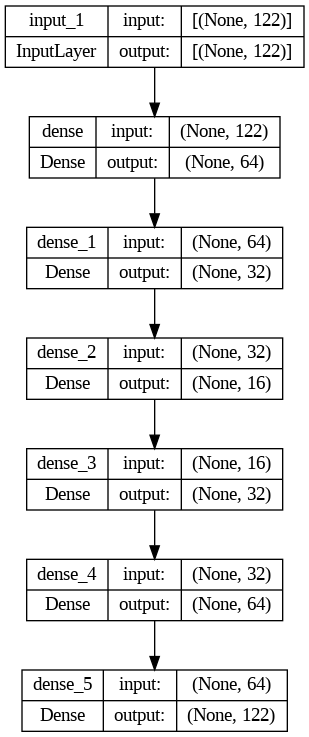

In [54]:
from keras.utils import plot_model

plot_model(autoencoder_cluster_122_4_0, to_file='autoencoder_visualization_122.png', show_shapes=True, show_layer_names=True)

## Cluster-Autoencoder 0

In [55]:
# from keras.models import load_model
# autoencoder_cluster_122_0 = load_model('/content/drive/MyDrive/Colab Notebooks/models/autoencoder-cluster-pair-122-v2/autoencoder_cluster_122_v2_0.h5')

In [56]:
training_array_0 = np.array(train_clustered_df[0]).astype("float32")
autoencoder_cluster_122_4_0.fit(training_array_0,training_array_0, epochs=50, batch_size=128, shuffle=True, validation_split=0.2, callbacks=[history_0])
ae_op_cluster_0 = autoencoder_cluster_122_4_0.predict(training_array_0)

Epoch 1/50
18/18 [==============================] - 2s 18ms/step - loss: 0.2309 - acc: 0.0000e+00 - val_loss: 0.1927 - val_acc: 0.0000e+00
Epoch 2/50
18/18 [==============================] - 0s 6ms/step - loss: 0.1093 - acc: 0.0000e+00 - val_loss: 0.0237 - val_acc: 0.0000e+00
Epoch 3/50
18/18 [==============================] - 0s 5ms/step - loss: 0.0122 - acc: 0.0000e+00 - val_loss: 0.0081 - val_acc: 0.0000e+00
Epoch 4/50
18/18 [==============================] - 0s 5ms/step - loss: 0.0087 - acc: 0.0000e+00 - val_loss: 0.0077 - val_acc: 0.0000e+00
Epoch 5/50
18/18 [==============================] - 0s 6ms/step - loss: 0.0085 - acc: 0.0000e+00 - val_loss: 0.0076 - val_acc: 0.0000e+00
Epoch 6/50
18/18 [==============================] - 0s 5ms/step - loss: 0.0083 - acc: 0.0000e+00 - val_loss: 0.0075 - val_acc: 0.0000e+00
Epoch 7/50
18/18 [==============================] - 0s 6ms/step - loss: 0.0081 - acc: 0.0000e+00 - val_loss: 0.0073 - val_acc: 0.0000e+00
Epoch 8/50
18/18 [===============

In [57]:
# from keras.models import save_model

# autoencoder_cluster_122_0.save('autoencoder_cluster_122_v2_0.h5')

In [58]:
mse_cluster_0_train = np.mean(np.power(training_array_0 - ae_op_cluster_0, 2), axis=1)
print(f"average MSE = {np.average(mse_cluster_0_train)}")

threshold_0 = np.mean(mse_cluster_0_train) + np.std(mse_cluster_0_train)
print("Threshold: ", threshold_0)

average MSE = 0.001249812077730894
Threshold:  0.00455174


## Cluster-Autoencoder 1

In [59]:
# from keras.models import load_model
# autoencoder_cluster_122_1 = load_model('/content/drive/MyDrive/Colab Notebooks/models/autoencoder-cluster-pair-122-v2/autoencoder_cluster_122_v2_1.h5')

In [60]:
training_array_1 = np.array(train_clustered_df[1]).astype("float32")
autoencoder_cluster_122_4_1.fit(training_array_1,training_array_1, epochs=50, batch_size=128, shuffle=True, validation_split=0.2, callbacks=[history_0])
ae_op_cluster_1 = autoencoder_cluster_122_4_1.predict(training_array_1)

Epoch 1/50
96/96 [==============================] - 2s 6ms/step - loss: 0.0828 - acc: 0.0231 - val_loss: 0.0139 - val_acc: 0.0049
Epoch 2/50
96/96 [==============================] - 0s 4ms/step - loss: 0.0125 - acc: 0.0054 - val_loss: 0.0099 - val_acc: 0.0049
Epoch 3/50
96/96 [==============================] - 0s 4ms/step - loss: 0.0086 - acc: 0.0054 - val_loss: 0.0080 - val_acc: 0.0049
Epoch 4/50
96/96 [==============================] - 0s 4ms/step - loss: 0.0075 - acc: 0.0054 - val_loss: 0.0069 - val_acc: 0.0049
Epoch 5/50
96/96 [==============================] - 0s 4ms/step - loss: 0.0062 - acc: 0.0035 - val_loss: 0.0057 - val_acc: 0.0042
Epoch 6/50
96/96 [==============================] - 0s 4ms/step - loss: 0.0054 - acc: 5.7092e-04 - val_loss: 0.0051 - val_acc: 3.2616e-04
Epoch 7/50
96/96 [==============================] - 0s 4ms/step - loss: 0.0047 - acc: 2.4468e-04 - val_loss: 0.0044 - val_acc: 3.2616e-04
Epoch 8/50
96/96 [==============================] - 0s 4ms/step - loss: 0.

In [61]:
# from keras.models import save_model

# autoencoder_cluster_122_1.save('autoencoder_cluster_122_v2_1.h5')

In [62]:
mse_cluster_1_train = np.mean(np.power(training_array_1 - ae_op_cluster_1, 2), axis=1)
print(f"average MSE = {np.average(mse_cluster_1_train)}")

threshold_1 = np.mean(mse_cluster_1_train) + np.std(mse_cluster_1_train)
print("Threshold: ", threshold_1)

average MSE = 0.002403424121439457
Threshold:  0.0091456445


## Cluster-Autoencoder 2

In [63]:
# from keras.models import load_model
# autoencoder_cluster_122_2 = load_model('/content/drive/MyDrive/Colab Notebooks/models/autoencoder-cluster-pair-122-v2/autoencoder_cluster_122_v2_2.h5')

In [64]:
training_array_2 = np.array(train_clustered_df[2]).astype("float32")
autoencoder_cluster_122_4_2.fit(training_array_2,training_array_2, epochs=50, batch_size=128, shuffle=True, validation_split=0.2, callbacks=[history_0])
ae_op_cluster_2 = autoencoder_cluster_122_4_2.predict(training_array_2)

Epoch 1/50
86/86 [==============================] - 2s 10ms/step - loss: 0.0881 - acc: 5.4985e-04 - val_loss: 0.0130 - val_acc: 0.0000e+00
Epoch 2/50
86/86 [==============================] - 0s 6ms/step - loss: 0.0112 - acc: 0.0000e+00 - val_loss: 0.0080 - val_acc: 0.0000e+00
Epoch 3/50
86/86 [==============================] - 0s 4ms/step - loss: 0.0066 - acc: 0.0000e+00 - val_loss: 0.0059 - val_acc: 0.0000e+00
Epoch 4/50
86/86 [==============================] - 0s 3ms/step - loss: 0.0045 - acc: 0.0000e+00 - val_loss: 0.0038 - val_acc: 0.0000e+00
Epoch 5/50
86/86 [==============================] - 0s 3ms/step - loss: 0.0033 - acc: 0.0000e+00 - val_loss: 0.0029 - val_acc: 0.0000e+00
Epoch 6/50
86/86 [==============================] - 0s 4ms/step - loss: 0.0023 - acc: 0.0000e+00 - val_loss: 0.0020 - val_acc: 0.0000e+00
Epoch 7/50
86/86 [==============================] - 0s 4ms/step - loss: 0.0017 - acc: 0.0000e+00 - val_loss: 0.0016 - val_acc: 0.0000e+00
Epoch 8/50
86/86 [===============

In [65]:
# from keras.models import save_model

# autoencoder_cluster_122_2.save('autoencoder_cluster_122_v2_2.h5')

In [66]:
mse_cluster_2_train = np.mean(np.power(training_array_2 - ae_op_cluster_2, 2), axis=1)
print(f"average MSE = {np.average(mse_cluster_2_train)}")

threshold_2 = np.mean(mse_cluster_2_train) + np.std(mse_cluster_2_train)
print("Threshold: ", threshold_2)

average MSE = 0.0006649142014794052
Threshold:  0.002723682


## Cluster-Autoencoder 3

In [67]:
# from keras.models import load_model
# autoencoder_cluster_122_3 = load_model('/content/drive/MyDrive/Colab Notebooks/models/autoencoder-cluster-pair-122-v2/autoencoder_cluster_122_v2_3.h5')

In [68]:
training_array_3 = np.array(train_clustered_df[3]).astype("float32")
autoencoder_cluster_122_4_3.fit(training_array_3,training_array_3, epochs=50, batch_size=128, shuffle=True, validation_split=0.2, callbacks=[history_0])
ae_op_cluster_3 = autoencoder_cluster_122_4_3.predict(training_array_3)

Epoch 1/50
221/221 [==============================] - 2s 4ms/step - loss: 0.0354 - acc: 0.0071 - val_loss: 0.0020 - val_acc: 0.0089
Epoch 2/50
221/221 [==============================] - 1s 3ms/step - loss: 0.0014 - acc: 0.0080 - val_loss: 0.0013 - val_acc: 0.0089
Epoch 3/50
221/221 [==============================] - 1s 5ms/step - loss: 0.0011 - acc: 0.0055 - val_loss: 8.1163e-04 - val_acc: 0.0020
Epoch 4/50
221/221 [==============================] - 1s 6ms/step - loss: 6.7565e-04 - acc: 0.0037 - val_loss: 4.9606e-04 - val_acc: 0.0068
Epoch 5/50
221/221 [==============================] - 1s 6ms/step - loss: 4.2000e-04 - acc: 0.0021 - val_loss: 3.7160e-04 - val_acc: 1.4186e-04
Epoch 6/50
221/221 [==============================] - 1s 4ms/step - loss: 3.4287e-04 - acc: 7.0935e-05 - val_loss: 3.3186e-04 - val_acc: 1.4186e-04
Epoch 7/50
221/221 [==============================] - 1s 4ms/step - loss: 3.1699e-04 - acc: 7.0935e-05 - val_loss: 3.1663e-04 - val_acc: 1.4186e-04
Epoch 8/50
221/221 [

In [69]:
# from keras.models import save_model

# autoencoder_cluster_122_3.save('autoencoder_cluster_122_v2_3.h5')

In [70]:
mse_cluster_3_train = np.mean(np.power(training_array_3 - ae_op_cluster_3, 2), axis=1)
print(f"average MSE = {np.average(mse_cluster_3_train)}")

threshold_3 = np.mean(mse_cluster_3_train) + np.std(mse_cluster_3_train)
print("Threshold: ", threshold_3)

average MSE = 4.523267853073776e-05
Threshold:  0.00050606823


In [71]:
# threshold_ppf_arr = [threshold_0,threshold_1,threshold_2,threshold_3]
threshold_arr = [threshold_0,threshold_1,threshold_2,threshold_3]
autoencoder_arr = [autoencoder_cluster_122_4_0,autoencoder_cluster_122_4_1,autoencoder_cluster_122_4_2,autoencoder_cluster_122_4_3]

In [72]:
def cluster_assignment_bulk(test_data):
  test_data_arr = np.array(test_data)
  return kmeans.predict(test_data_arr)

In [73]:
def cluster_autoencoder_pair_bulk(X):
    count_anomalous_ = 0
    count_normal_ = 0
    y_pred_ = list()
    cluster_no_arr = cluster_assignment_bulk(X)
    cluster_data_arrays = {}
    for cluster_value in np.unique(cluster_no_arr):
        cluster_data_arrays[cluster_value] = X[cluster_no_arr == cluster_value]
    autoencoder_output_arr = {}
    for i in np.unique(cluster_no_arr):
        autoencoder_output_arr[i] = autoencoder_arr[i].predict(cluster_data_arrays[i])
        losses = np.mean(np.power(cluster_data_arrays[i] - autoencoder_output_arr[i], 2), axis=1)
        for loss in losses:
          if loss > threshold_arr[i]:
              count_anomalous_ += 1
              y_pred_.append(1)
          else:
              count_normal_ += 1
              y_pred_.append(0)
    return count_anomalous_, count_normal_, y_pred_

In [74]:
unique_values, value_counts = np.unique(cluster_assignment_bulk(anomalous_test), return_counts=True)

for value, count in zip(unique_values, value_counts):
    print(f"Value: {value}, Count: {count}")

Value: 0, Count: 17003
Value: 1, Count: 41185
Value: 2, Count: 11310
Value: 3, Count: 1965


In [75]:
unique_values, value_counts = np.unique(cluster_assignment_bulk(x_train), return_counts=True)

for value, count in zip(unique_values, value_counts):
    print(f"Value: {value}, Count: {count}")

Value: 0, Count: 2843
Value: 1, Count: 15327
Value: 2, Count: 13640
Value: 3, Count: 35244


In [76]:
actual_normal_count_anomalous, actual_normal_count_normal, actual_normal_y_pred = cluster_autoencoder_pair_bulk(normal_test)

213/213 [==============================] - 0s 2ms/step


In [77]:
actual_normal_count_anomalous, actual_normal_count_normal

(956, 9044)

In [78]:
actual_anomalous_count_anomalous, actual_anomalous_count_normal, actual_anomalous_y_pred = cluster_autoencoder_pair_bulk(anomalous_test)

62/62 [==============================] - 0s 1ms/step


In [79]:
actual_anomalous_count_anomalous, actual_anomalous_count_normal,

(65192, 6271)

In [80]:
count_anomalous, count_normal, y_pred = cluster_autoencoder_pair_bulk(x_test)

275/275 [==============================] - 0s 1ms/step


In [81]:
count_anomalous, count_normal

(66148, 15315)

In [82]:
y = kmeans.predict(x_test)

test_df['Cluster_4'] = y

test_df.head(3)

duration src_bytes dst_bytes land wrong_fragment urgent  hot  \
0      0.0       0.0       0.0    0              0    0.0  0.0   
1      0.0  0.000001       0.0    0              0    0.0  0.0   
2      0.0       0.0   0.00001    0              0    0.0  0.0   

  num_failed_logins logged_in num_compromised root_shell su_attempted  \
0               0.0         0             0.0          0          0.0   
1               0.0         1             0.0          0          0.0   
2               0.0         1             0.0          0          0.0   

  num_root num_file_creations num_shells num_access_files num_outbound_cmds  \
0      0.0                0.0        0.0              0.0                 0   
1      0.0                0.0        0.0              0.0                 0   
2      0.0                0.0        0.0              0.0                 0   

  is_host_login is_guest_login     count srv_count serror_rate  \
0             0              0  0.209393  0.209393         0.0   
1             0              0  0.003914  0.003914         0.0   
2             0              0   0.04501  0.046967         0.0   

  srv_serror_rate rerror_rate srv_rerror_rate same_srv_rate diff_srv_rate  \
0             0.0         0.0             0.0           1.0           0.0   
1             0.0         0.0             0.0           1.0           0.0   
2             0.0         0.0             0.0           1.0           0.0   

  srv_diff_host_rate dst_host_count dst_host_srv_count dst_host_same_srv_rate  \
0                0.0            1.0           0.784314                   0.78   
1                0.0            1.0           0.580392                   0.58   
2               0.08            1.0                1.0                    1.0   

  dst_host_diff_srv_rate dst_host_same_src_port_rate  \
0                   0.01                         0.0   
1                   0.03                        0.59   
2                    0.0                         0.0   

  dst_host_srv_diff_host_rate dst_host_serror_rate dst_host_srv_serror_rate  \
0                         0.0                  0.0                      0.0   
1                         0.0                  0.0                     0.01   
2                         0.0                  0.0                      0.0   

  dst_host_rerror_rate dst_host_srv_rerror_rate   label protocol_type_icmp  \
0                  0.0                      0.0  normal              False   
1                  0.0                      0.0  normal              False   
2                  0.0                      0.0  normal              False   

  protocol_type_tcp protocol_type_udp service_IRC service_X11 service_Z39_50  \
0             False              True       False       False          False   
1              True             False       False       False          False   
2              True             False       False       False          False   

  service_aol service_auth service_bgp service_courier service_csnet_ns  \
0       False        False       False           False            False   
1       False        False       False           False            False   
2       False        False       False           False            False   

  service_ctf service_daytime service_discard service_domain service_domain_u  \
0       False           False           False          False             True   
1       False           False           False          False            False   
2       False           False           False          False            False   

  service_echo service_eco_i service_ecr_i service_efs service_exec  \
0        False         False         False       False        False   
1        False         False         False       False        False   
2        False         False         False       False        False   

  service_finger service_ftp service_ftp_data service_gopher service_harvest  \
0          False       False            False          False 

In [83]:
y_true_ = []

for cluster_value in range(4):
    cluster_df = test_df[test_df['Cluster_4'] == cluster_value]
    y = np.where(cluster_df['label'] == 'normal', 0, 1)
    y_true_.extend(y)

In [84]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_true_, y_pred)

print("Confusion Matrix:")
print(cm)

print("\nClassification Report:")
print(classification_report(y_true_, y_pred))

Confusion Matrix:
[[ 9044   956]
 [ 6271 65192]]

Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.90      0.71     10000
           1       0.99      0.91      0.95     71463

    accuracy                           0.91     81463
   macro avg       0.79      0.91      0.83     81463
weighted avg       0.94      0.91      0.92     81463

